In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## 1. Import Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Bank Customer Churn Prediction.csv')

In [4]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Data shape is 10000 * 12

## 2. EDA 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


There are no missing values and 2 columns have string data type.

In [6]:
# Target Variable
df.churn.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: churn, dtype: float64

The ratio of churn 0 and 1 is about 80:20.

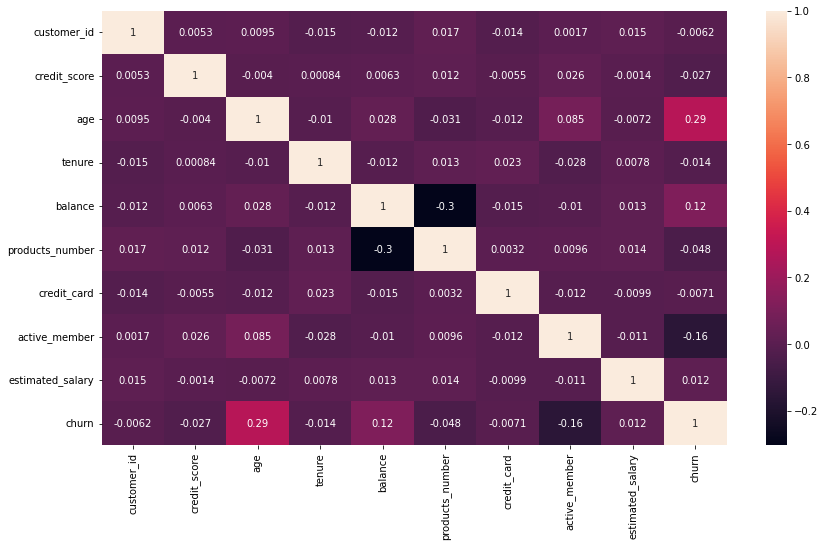

In [7]:
# Correlation
corr = df.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=True)

- 'age' and 'balance' seem to correlate with target variable.
- 'balance' and 'product_number' show negative correlation.

### 1) Numerical Variables

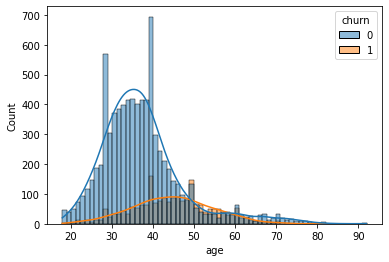

In [8]:
# Age Distribution
sns.histplot(data=df, x='age', hue='churn', kde=True)

In [9]:
df.age.nunique()

70

In [10]:
# Age & Target Variable
age_mean = df.groupby('age')['churn'].mean()
age_mean

age
18    0.090909
19    0.037037
20    0.050000
21    0.056604
22    0.142857
        ...   
83    0.000000
84    0.500000
85    0.000000
88    0.000000
92    0.000000
Name: churn, Length: 70, dtype: float64

Text(0, 0.5, 'Churn Ratio')

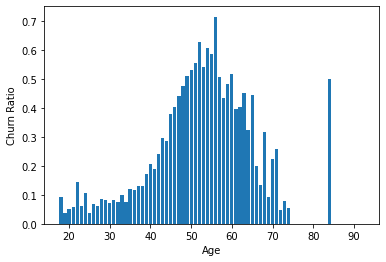

In [11]:
plt.bar(age_mean.index, age_mean.values)
plt.xlabel('Age')
plt.ylabel('Churn Ratio')

Churn ratio is high between the ages of 50's and 60's.

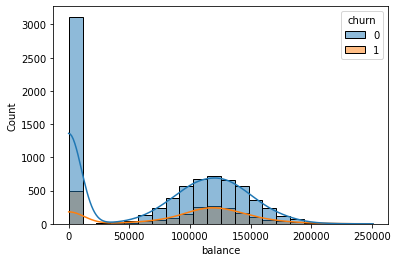

In [12]:
# Balance Distribution
sns.histplot(data=df, x='balance', hue='churn', kde=True)

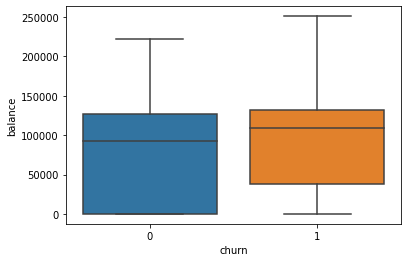

In [13]:
# Balance & Target Variable
sns.boxplot(data=df, x='churn', y='balance')

churn 1 has a slighly higher median value as churn 0 has intensive data distribution between 0 to 50000.

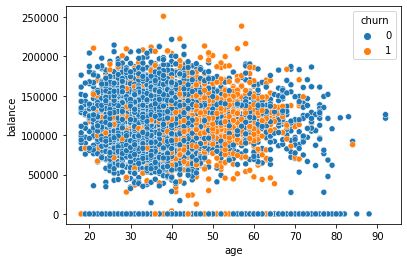

In [14]:
# Age & Balance
sns.scatterplot(data=df, x='age', y='balance', hue='churn')

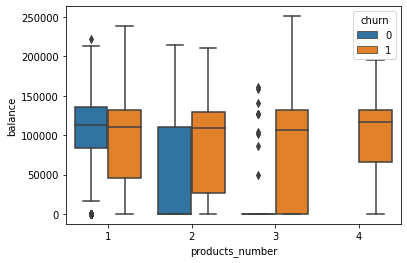

In [15]:
# Balance & Product_number
sns.boxplot(data=df, x='products_number', y='balance', hue='churn')

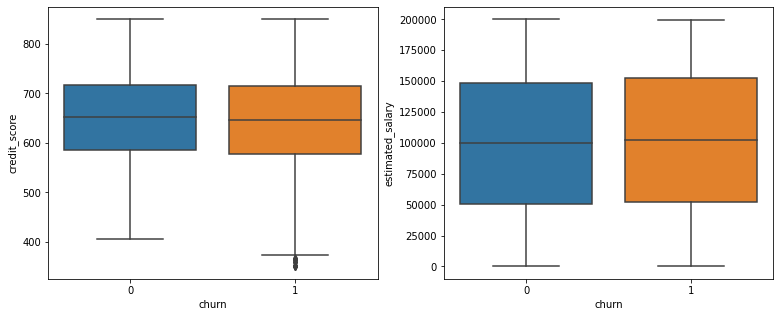

In [16]:
# Credit score and Estimated salary
plt.figure(figsize = (13,5))

plt.subplot(1, 2, 1)
sns.boxplot(x='churn', y = 'credit_score', data = df)

plt.subplot(1, 2, 2)
sns.boxplot(x='churn', y = 'estimated_salary', data = df)

In [17]:
# credit_score outlier
Q1 = df['credit_score'].quantile(0.25)
Q3 = df['credit_score'].quantile(0.75)
IQR = Q3-Q1
under_outlier = Q1 - IQR*1.5
print(under_outlier)

383.0


### 2) Categorical Variable

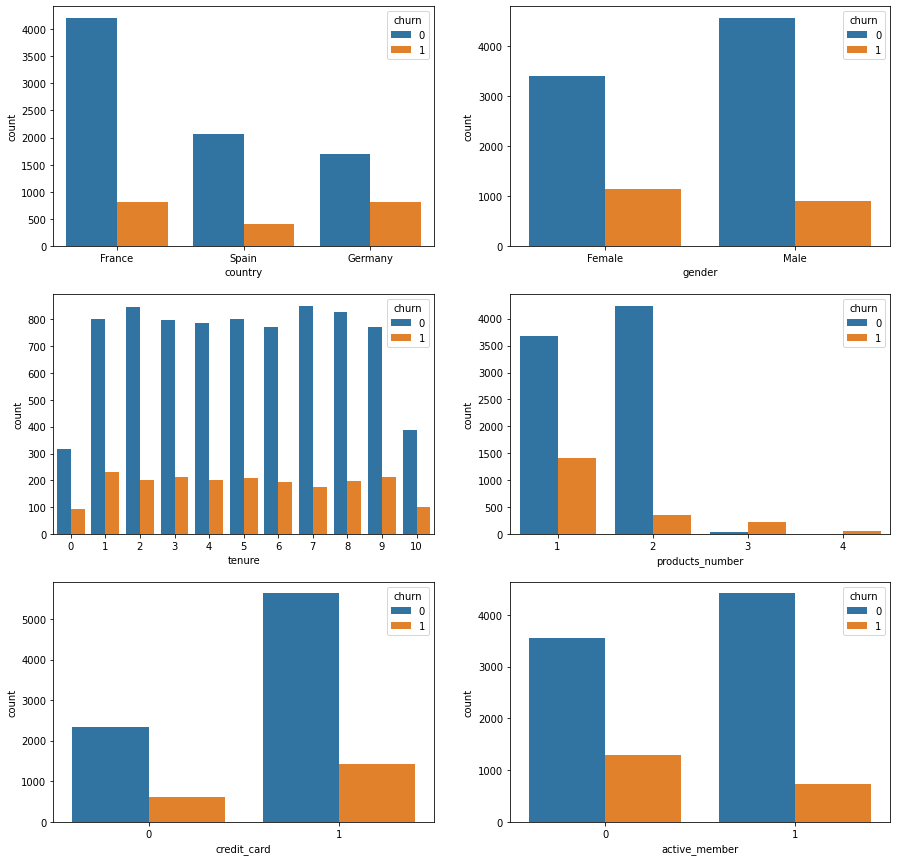

In [18]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'country', hue='churn', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'gender', hue='churn', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'tenure', hue='churn', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'products_number', hue='churn', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'credit_card', hue='churn', data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'active_member', hue='churn', data = df)

In [19]:
# country and target variable
df.groupby('country')['churn'].mean()

country
France     0.161548
Germany    0.324432
Spain      0.166734
Name: churn, dtype: float64

In [20]:
# credit_card and target variable
df.groupby('credit_card')['churn'].mean()

credit_card
0    0.208149
1    0.201843
Name: churn, dtype: float64

In [21]:
# product_number and target variable
df.groupby('products_number')['churn'].mean()

products_number
1    0.277144
2    0.075817
3    0.827068
4    1.000000
Name: churn, dtype: float64

In [22]:
# active member and target variable
df.groupby('active_member')['churn'].mean()

active_member
0    0.268509
1    0.142691
Name: churn, dtype: float64

## 3. Feature Engineering

In [23]:
# age binning
df['age_group'] = 0

df.loc[df['age'] < 20, 'age_group'] = 1
df.loc[(df['age'] >=20) & (df['age'] < 25), 'age_group'] = 2
df.loc[(df['age'] >=25) & (df['age'] < 30), 'age_group'] = 3
df.loc[(df['age'] >=30) & (df['age'] < 35), 'age_group'] = 4
df.loc[(df['age'] >=35) & (df['age'] < 40), 'age_group'] = 5
df.loc[(df['age'] >=40) & (df['age'] < 45), 'age_group'] = 6
df.loc[(df['age'] >=45) & (df['age'] < 50), 'age_group'] = 7
df.loc[(df['age'] >=50) & (df['age'] < 55), 'age_group'] = 8
df.loc[(df['age'] >=55) & (df['age'] < 60), 'age_group'] = 9
df.loc[(df['age'] >=60) & (df['age'] < 65), 'age_group'] = 10
df.loc[(df['age'] >=65) & (df['age'] < 70), 'age_group'] = 11
df.loc[(df['age'] >=70) & (df['age'] < 75), 'age_group'] = 12
df.loc[(df['age'] >=75) & (df['age'] < 80), 'age_group'] = 13
df.loc[df['age'] >= 80, 'age_group'] = 14

In [24]:
df.groupby('age_group')['churn'].mean()

age_group
1     0.061224
2     0.090686
3     0.070946
4     0.081452
5     0.133016
6     0.236701
7     0.433862
8     0.569201
9     0.547753
10    0.426230
11    0.213740
12    0.144330
13    0.000000
14    0.066667
Name: churn, dtype: float64

In [25]:
df['balance_group'] = 0

df.loc[df['balance'] == 0.0, 'balance_group'] = 1
df.loc[(df['balance'] > 0) & (df['balance'] < 50000), 'balance_group'] = 2
df.loc[(df['balance'] >= 50000) & (df['balance'] < 100000), 'balance_group'] = 3
df.loc[(df['balance'] >= 100000) & (df['balance'] < 150000), 'balance_group'] = 4
df.loc[(df['balance'] >= 150000) & (df['balance'] < 200000), 'balance_group'] = 5
df.loc[(df['balance'] >= 200000), 'balance_group'] = 6

In [26]:
df.groupby('balance_group')['churn'].mean()

balance_group
1    0.138236
2    0.346667
3    0.198807
4    0.257702
5    0.219251
6    0.558824
Name: churn, dtype: float64

In [27]:
# credit_score binning
df['credit_score_group'] = 0

df.loc[df['credit_score'] < under_outlier, 'credit_score_group'] = 1
df.loc[(df['credit_score'] >=under_outlier) & (df['credit_score'] < 400), 'credit_score_group'] = 2
df.loc[(df['credit_score'] >=400) & (df['credit_score']< 500), 'credit_score_group'] = 3
df.loc[(df['credit_score'] >=500) & (df['credit_score'] < 600), 'credit_score_group'] = 4
df.loc[(df['credit_score'] >=600) & (df['credit_score'] < 700), 'credit_score_group'] = 5
df.loc[(df['credit_score'] >=700) & (df['credit_score'] < 800), 'credit_score_group'] = 6
df.loc[df['credit_score'] >= 800, 'credit_score_group'] = 7

In [28]:
df.groupby('credit_score_group')['churn'].mean()

credit_score_group
1    1.000000
2    1.000000
3    0.213703
4    0.212323
5    0.197224
6    0.198957
7    0.195420
Name: churn, dtype: float64

In [29]:
# Drop columns
df = df.drop(['customer_id', 'age', 'balance', 'credit_score'], axis=1)

In [30]:
y = df['churn'].values
X = df.drop('churn', axis=1)

In [31]:
X

,country,gender,tenure,products_number,credit_card,active_member,estimated_salary,age_group,balance_group,credit_score_group
0,France,Female,2,1,1,1,101348.88,6,1,5
1,Spain,Female,1,1,0,1,112542.58,6,3,5
2,France,Female,8,3,1,0,113931.57,6,5,4
3,France,Female,1,2,0,0,93826.63,5,1,5
4,Spain,Female,2,1,1,1,79084.10,6,4,7
...,...,...,...,...,...,...,...,...,...,...
9995,France,Male,5,2,1,0,96270.64,5,1,6
9996,France,Male,10,1,1,1,101699.77,5,3,4
9997,France,Female,7,1,0,1,42085.58,5,1,6
9998,Germany,Male,3,2,1,0,92888.52,6,3,6


In [32]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder_country = LabelEncoder()
label_encoder_gender = LabelEncoder()

X['country'] = label_encoder_country.fit_transform(X['country'])
X['gender'] = label_encoder_gender.fit_transform(X['gender'])

In [33]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [34]:
print('The shape of X is', X_standard.shape)

The shape of X is (10000, 10)


## 4. Modeling 

In [35]:
# train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, stratify=y, random_state = 0)

In [36]:
# model list
models = [LogisticRegression, SVC, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, XGBClassifier, LGBMClassifier]         
model_names = ['Logistic Regression', 'SVC', 'KNN', 'Decision Tree', 'Random Forest', 'XGB', 'LGBM' ]
scores = {}

# smote with cross-validation
from sklearn.model_selection import cross_validate
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

for ind, mod in enumerate(models):
    steps = [('over', SMOTE()), ('model', mod())]
    pipeline = Pipeline(steps=steps)
    acc = cross_validate(pipeline, X_train, y_train, cv=5, scoring=('accuracy', 'precision', 'recall','f1'))
    scores[model_names[ind]] = {'valid accuracy': acc['test_accuracy'].mean(), 'valid precision': acc['test_precision'].mean(), 'valid recall': acc['test_recall'].mean(), 'valid f1': acc['test_f1'].mean()}                                    

In [37]:
results = pd.DataFrame(scores).T

In [38]:
results.sort_values('valid accuracy', ascending=False)

,valid accuracy,valid precision,valid recall,valid f1
LGBM,0.861000,0.711470,0.535075,0.610522
XGB,0.850714,0.638984,0.613620,0.625924
Random Forest,0.845143,0.655242,0.507020,0.571627
SVC,0.789714,0.488670,0.693571,0.573244
Decision Tree,0.782286,0.468685,0.514737,0.490591
KNN,0.742143,0.417625,0.668316,0.513853
Logistic Regression,0.710143,0.381665,0.682346,0.489501


## 5. Hyperparameter Testing

In [39]:
# Random Forest	
from sklearn.model_selection import GridSearchCV, StratifiedKFold

n_estimators = [10, 50, 100, 200]
max_depth = [3, 5, 7]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 6]
min_samples_leaf = [2, 6]

pipeline = Pipeline(steps=[('smt', SMOTE(random_state=0)), ('mod', RandomForestClassifier())])

hyperparams = {'mod__n_estimators': n_estimators, 'mod__max_depth': max_depth, 
               'mod__max_features': max_features, 'mod__min_samples_split': min_samples_split, 
               'mod__min_samples_leaf': min_samples_leaf}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

gs=GridSearchCV(estimator = pipeline, param_grid = hyperparams, cv=stratified_kfold, 
                scoring = ['accuracy', 'f1'], refit='f1', n_jobs=-1)
gs.fit(X_train, y_train)
print('valid f1:', gs.best_score_) # Mean cross-validated score of the best_estimator
print('best paramters:', gs.best_params_) # Parameter setting that gave the best results on the hold out data.

valid f1: 0.6102840891744202
best paramters: {'mod__max_depth': 7, 'mod__max_features': 0.5, 'mod__min_samples_leaf': 6, 'mod__min_samples_split': 6, 'mod__n_estimators': 50}


In [40]:
# Test result
test_f1 = gs.score(X_test, y_test)
y_pred = gs.predict(X_test) 
print('test f1:', test_f1) 
print(classification_report(y_test, y_pred)) 

test f1: 0.5988700564971753
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2389
           1       0.59      0.61      0.60       611

    accuracy                           0.83      3000
   macro avg       0.74      0.75      0.75      3000
weighted avg       0.84      0.83      0.84      3000



In [41]:
# XGB
learning_rate = [0.01, 0.05, 0.1]
n_estimators = [10, 50, 100, 250]
max_depth = [3, 4, 5, 6, 7]
min_child_weight = [1, 2, 3, 4, 5]

pipeline = Pipeline([('smt', SMOTE(random_state=0)), ('mod', XGBClassifier())])

hyperparams = {'mod__learning_rate': learning_rate, 'mod__n_estimators': n_estimators, 
               'mod__max_depth': max_depth, 'mod__min_child_weight': min_child_weight}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

gs=GridSearchCV(estimator = pipeline, param_grid = hyperparams, cv=stratified_kfold, 
                scoring = ['accuracy', 'f1'], refit='f1', n_jobs=-1)
gs.fit(X_train, y_train)
print('valid f1:', gs.best_score_)
print('best paramters:', gs.best_params_)

valid f1: 0.6234716538434425
best paramters: {'mod__learning_rate': 0.1, 'mod__max_depth': 4, 'mod__min_child_weight': 4, 'mod__n_estimators': 50}


In [42]:
# Test result
test_f1 = gs.score(X_test, y_test)
y_pred = gs.predict(X_test) 
print('test f1:', test_f1) 
print(classification_report(y_test, y_pred)) 

test f1: 0.5948632974316487
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2389
           1       0.60      0.59      0.59       611

    accuracy                           0.84      3000
   macro avg       0.75      0.74      0.75      3000
weighted avg       0.84      0.84      0.84      3000



In [43]:
# LGBM
learning_rate = [0.01, 0.05, 0.1]
num_leaves = [20, 50, 100]
max_depth = [3, 4, 5, 6, 7]
min_child_samples = [5, 10, 15]

pipeline = Pipeline([('smt', SMOTE(random_state=0)), ('mod', LGBMClassifier())])

hyperparams = {'mod__learning_rate': learning_rate, 'mod__num_leaves': num_leaves, 
               'mod__max_depth': max_depth, 'mod__min_child_samples': min_child_samples}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

gs=GridSearchCV(estimator = pipeline, param_grid = hyperparams, cv=stratified_kfold, 
                scoring = ['accuracy', 'f1'], refit='f1', n_jobs=-1)
gs.fit(X_train, y_train)
print('valid f1:', gs.best_score_)
print('best paramters:', gs.best_params_)

valid f1: 0.6220790292556331
best paramters: {'mod__learning_rate': 0.05, 'mod__max_depth': 4, 'mod__min_child_samples': 5, 'mod__num_leaves': 20}


In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Save** **Model**

In [45]:
import pickle
file = 'Churn_model.pkl'
pickle.dump(gs, open(file, 'wb'))

In [46]:
load_model = pickle.load(open(file, 'rb'))

In [48]:
y_prep = load_model.predict(X_test)

In [51]:
y_prep

array([0, 1, 0, ..., 0, 1, 0])

In [52]:
y_prep[1]

1